<a href="https://colab.research.google.com/github/princeKike27/Credit-Card-Approval-Prediction/blob/master/Credit_Car_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Approval Prediction

- For this project I created a Machine Learning Model that predicts if an applicant is a *good* or *bad* client for having a Credit Card Approved. Credit score cards are a common risk control method in the financial industry since it uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is then able to decide, whether or not to issue a credit card to the applicant.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Importing Datasets

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

# set style of plots
sns.set()

In [2]:
# save urls of dataset
url_application = 'https://raw.githubusercontent.com/princeKike27/Credit-Card-Approval-Prediction/master/Desktop/Docs%20Escritorio/PR%20ML/Credit%20Card%20Approval/application_record.csv'
url_credit_record = 'https://raw.githubusercontent.com/princeKike27/Credit-Card-Approval-Prediction/master/Desktop/Docs%20Escritorio/PR%20ML/Credit%20Card%20Approval/credit_record.csv'

# dataframes
df_applications = pd.read_csv(url_application)
df_credit_record = pd.read_csv(url_credit_record)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Application Records

- The *Application Records* dataset contains the following Features:

    - ID: client number
    - CODE_GENDER: gender
    - FLAG_OWN_CAR: is there a car
    - FLAG_OWN_REALTY: is there a property
    - CNT_CHILDREN: number of children
    - AMT_INCOME_TOTAL: annual income
    - NAME_INCOME_TYPE: income category
    - NAME_EDUCATION_TYPE: education level
    - NAME_FAMILY_STATUS: marital status
    - NAME_HOUSING_TYPE: way of living
    - DAYS_BIRTH: birthday, count backwards from current day, -1 means yesterday
    - DAYS_EMPLOYED: start date of employment, count backwards from current day, if positive means the person is currently unemployed
    - FLAG_MOBIL: is there a mobile phone
    - FLAG_WORK_PHONE: is there a work phone
    - FLAG_EMAIL: is there an email
    - OCCUPATION_TYPE: occupation
    - CANT_FAM_MEMBERS: family size



In [3]:
# applications dataframe
df_applications

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
# check column types
df_applications.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [5]:
# check for missing values
df_applications.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

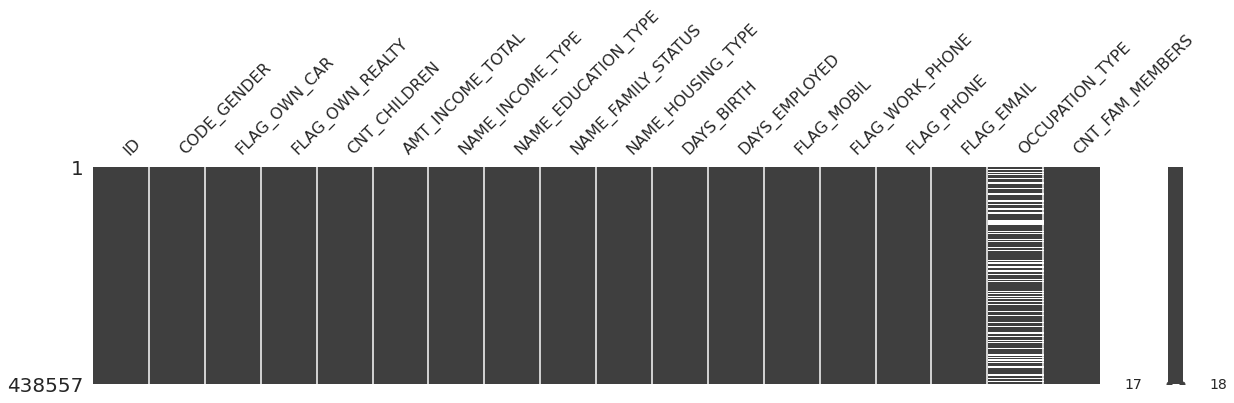

In [6]:
# missing value matrix
import missingno as msg

msg.matrix(df_applications, figsize=(20, 4))

- As can be seen above, there are $134,203$ NaN values in the OCCUPATION_TYPE column wich represent 30.6\% of the data

In [7]:
# value counts of features

# columns list
cols = list(df_applications.columns)

for col in cols:
  print(df_applications[col].value_counts())
  print('\n')

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID, Length: 438510, dtype: int64


F    294440
M    144117
Name: CODE_GENDER, dtype: int64


N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64


0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64


135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64


Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


Se

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Categorical Variables

#### Gender

- CODE_GENDER

In [8]:
# gender frequency table
gender_frequency = df_applications['CODE_GENDER'].value_counts().reset_index()

# rename colummns
gender_frequency.rename(columns={'index': 'gender',
                                 'CODE_GENDER': 'absolute_freq'}, inplace=True)
# relative frequency
gender_frequency['relative_freq'] = gender_frequency['absolute_freq'] / len(df_applications)


gender_frequency

,gender,absolute_freq,relative_freq
0,F,294440,0.671384
1,M,144117,0.328616


- Above we can see the Frequency Table of Gender, from it we can say that 67.13% of the Credit Card applications, during the period analyzed, correspond to women while, 32.86% of the Credit Card applications are from men. The Countplot below shows us the gap between Genders

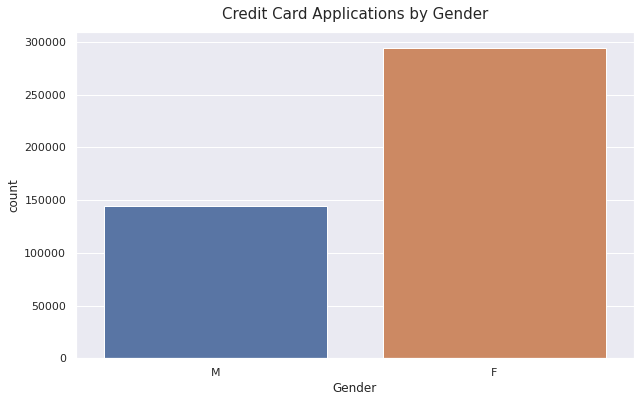

In [9]:
# countplot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x=df_applications.CODE_GENDER)

plt.xlabel('Gender')
plt.title('Credit Card Applications by Gender', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Car Ownership

- FLAG_OWN_CAR

In [10]:
# car_ownership frequency table
car_ownership = df_applications['FLAG_OWN_CAR'].value_counts().reset_index()

# change column names
car_ownership.rename(columns={'index': 'owns_car',
                              'FLAG_OWN_CAR': 'absolute_freq'}, inplace=True)

# relative frequency
car_ownership['absolute_freq'] = car_ownership['absolute_freq'] / len(df_applications)

car_ownership

,owns_car,absolute_freq
0,N,0.628103
1,Y,0.371897


- The Frequency Table of Car Ownership shows us that 62.81% of applicants for a Credit Card, during the period analyzed, didn't own a car while, the remaing 37.18% of applicants own a car. The Countplot below shows us graphically this difference

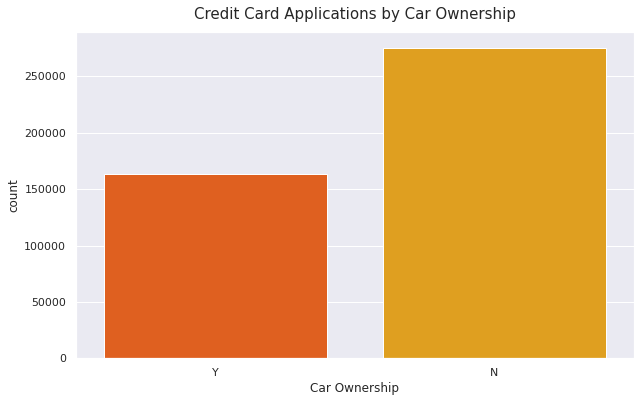

In [11]:
# countplot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='FLAG_OWN_CAR', data=df_applications, palette='autumn')

plt.xlabel('Car Ownership')
plt.title('Credit Card Applications by Car Ownership', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Realty Ownership

- FLAG_OWN_REALTY

In [12]:
# realty_ownership table
realty_ownership = df_applications['FLAG_OWN_REALTY'].value_counts().reset_index()

# change column names
realty_ownership.rename(columns={'index': 'owns_realty',
                                 'FLAG_OWN_REALTY': 'absolute_freq'}, inplace=True)

# relative frequency
realty_ownership['relative_freq'] = realty_ownership['absolute_freq'] / len(df_applications)

realty_ownership

,owns_realty,absolute_freq,relative_freq
0,Y,304074,0.693351
1,N,134483,0.306649


The Frequency Table above, shows us that 69.33% of the applicants for a Credit Card in the period analyzed own some type of Realty. On the other hand, 30,66% of the applicants didn't own any type of realty. The Countplot below show us this difference in Realty Ownership between Credit Card applicants

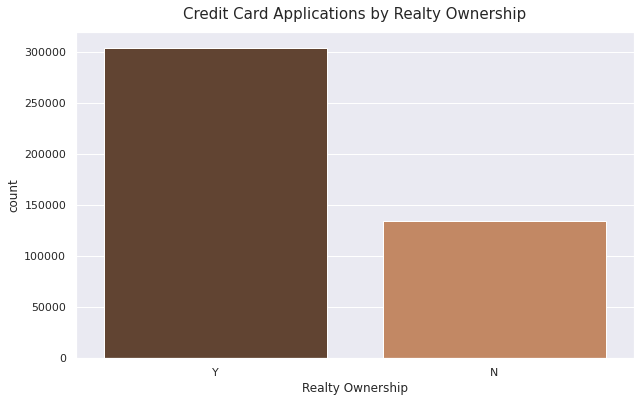

In [13]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='FLAG_OWN_REALTY', data=df_applications, palette='copper')

plt.xlabel('Realty Ownership')
plt.title('Credit Card Applications by Realty Ownership', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Income Type

- NAME_INCOME_TYPE


In [14]:
# income_type frequency table
income_type_freq = df_applications['NAME_INCOME_TYPE'].value_counts().reset_index()

# rename columns
income_type_freq.rename(columns={'index': 'income_type',
                                 'NAME_INCOME_TYPE': 'absolute_freq'}, inplace=True)

# absolute cumulative frequency
income_type_freq['abs_cum_freq'] = income_type_freq.absolute_freq.cumsum()

# relative frequency
income_type_freq['relative_freq'] = income_type_freq.absolute_freq / len(df_applications)

# relative cumulative frequency
income_type_freq['rel_cum_freq'] = income_type_freq.relative_freq.cumsum()

income_type_freq

,income_type,absolute_freq,abs_cum_freq,relative_freq,rel_cum_freq
0,Working,226104,226104,0.515564,0.515564
1,Commercial associate,100757,326861,0.229747,0.745310
2,Pensioner,75493,402354,0.172140,0.917450
3,State servant,36186,438540,0.082512,0.999961
4,Student,17,438557,0.000039,1.000000


- The Frequency Table above shows us that about 75% of the Credit Card Applicants, in the period analyzed, receive their income either from their Work (51%) or from being Commercial Associates (23%). The remaining 25% receive their income either from their Pension (17%), being a State Servant (8%) or being a Student. The Countplot belows shows us this difference in Income Type between applicants

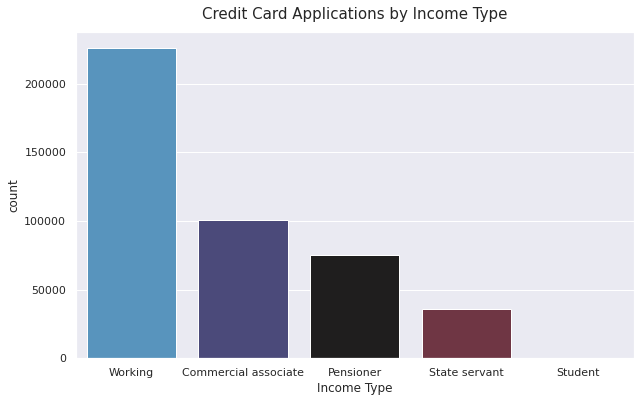

In [15]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='NAME_INCOME_TYPE', data=df_applications, palette='icefire')

plt.xlabel('Income Type')
plt.title('Credit Card Applications by Income Type', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Education

- NAME_EDUCATION_TYPE

In [16]:
# education frequency table
education_freq = df_applications['NAME_EDUCATION_TYPE'].value_counts().reset_index()

# rename columns
education_freq.rename(columns={'index': 'education_type',
                               'NAME_EDUCATION_TYPE': 'absolute_freq'}, inplace=True)

# absolute cumulative frequency
education_freq['abs_cum_freq'] = education_freq['absolute_freq'].cumsum()

# relative frequency
education_freq['relative_freq'] = education_freq['absolute_freq'] / len(df_applications)

# relative cumulative frequency
education_freq['rel_cum_freq'] = education_freq['relative_freq'].cumsum()

education_freq

,education_type,absolute_freq,abs_cum_freq,relative_freq,rel_cum_freq
0,Secondary / secondary special,301821,301821,0.688214,0.688214
1,Higher education,117522,419343,0.267974,0.956188
2,Incomplete higher,14851,434194,0.033863,0.990051
3,Lower secondary,4051,438245,0.009237,0.999289
4,Academic degree,312,438557,0.000711,1.000000


- The Frequency Table above shows us that 95% of the Credit Card Applicants have either a Secundary education (68%) or Higher education (26.7%). The remaining 5% of the applicants have either not completed Higher education, just have a Lower secondary degree or an Academic Degree. The countplot below shows us the difference in Education Type of Credit Card Applicants 

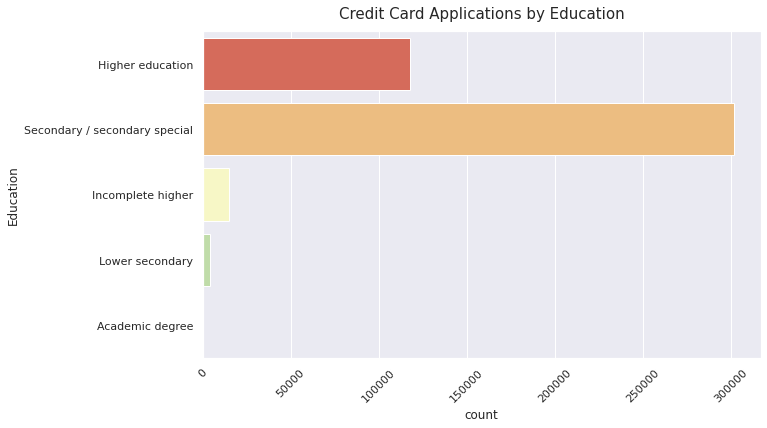

In [17]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(y='NAME_EDUCATION_TYPE', data=df_applications, palette='Spectral')

plt.xticks(rotation=45)
plt.ylabel('Education')

plt.title('Credit Card Applications by Education', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Occupation

- OCCUPATION_TYPE

In [18]:
# occupation frequency table
occupation_freq = df_applications['OCCUPATION_TYPE'].value_counts().reset_index()

# rename columns
occupation_freq.rename(columns={'index': 'occupation',
                                'OCCUPATION_TYPE': 'absolute_freq'}, inplace=True)

# absolute cumulative frequency
occupation_freq['abs_cum_freq'] = occupation_freq.absolute_freq.cumsum()

# relative frequency
occupation_freq['relative_freq'] = occupation_freq.absolute_freq / sum(occupation_freq.absolute_freq)

# relative cumulative frequency
occupation_freq['rel_cum_freq'] = occupation_freq.relative_freq.cumsum()

occupation_freq

,occupation,absolute_freq,abs_cum_freq,relative_freq,rel_cum_freq
0,Laborers,78240,78240,0.257069,0.257069
1,Core staff,43007,121247,0.141306,0.398375
2,Sales staff,41098,162345,0.135034,0.533408
3,Managers,35487,197832,0.116598,0.650006
4,Drivers,26090,223922,0.085723,0.735729
5,High skill tech staff,17289,241211,0.056806,0.792534
6,Accountants,15985,257196,0.052521,0.845055
7,Medicine staff,13520,270716,0.044422,0.889477
8,Cooking staff,8076,278792,0.026535,0.916012
9,Security staff,7993,286785,0.026262,0.942274


- The Frequency Table above show us that the the most common occupation between the Credit Card Applicants, in the period analyzed, are Laborers (25%), Core Staff (14%), Sales Staff (13%), Managers (11%) and Drivers (8%). These occupations account for 73% (223,922) of the applicants who filled this question in the Credit Card Application. On the other hand, Secretaries, Waiters / Barmen, Realty Agents, HR Staff and IT Staff are the least common occupations between applicants, representing less than 2.5%. The Countplot below show us these differences betweeen the occupation of the applicants 

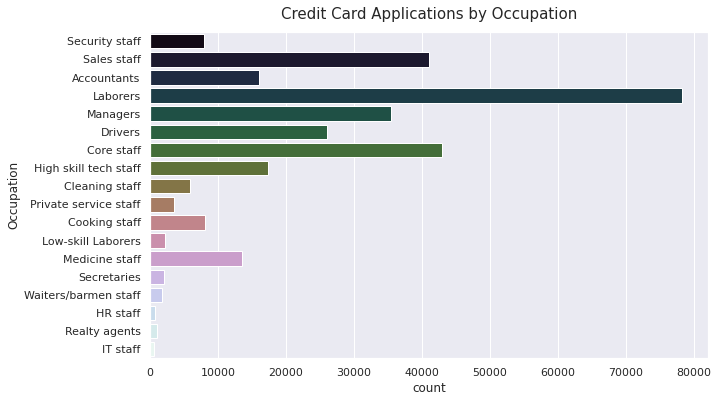

In [19]:
# plot 
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(y='OCCUPATION_TYPE', data=df_applications, palette='cubehelix')

plt.ylabel('Occupation')
plt.title('Credit Card Applications by Occupation', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Housing Type

- NAME_HOUSING_TYPE

In [20]:
# value counts of housing type
df_applications['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [21]:
# frequency table
housing_frequency = df_applications['NAME_HOUSING_TYPE'].value_counts().reset_index()

# rename columns
housing_frequency.rename(columns={'index': 'housing_type',
                                  'NAME_HOUSING_TYPE': 'absolute_freq'}, inplace=True)

# absoulte cummulative frequency
housing_frequency['abs_cum_freq'] = np.cumsum(housing_frequency.absolute_freq)

# relative frequency
housing_frequency['relative_freq'] = housing_frequency.absolute_freq / len(df_applications) 

# relative cummulative frequency
housing_frequency['rel_cum_freq'] = np.cumsum(housing_frequency.relative_freq)

housing_frequency

,housing_type,absolute_freq,abs_cum_freq,relative_freq,rel_cum_freq
0,House / apartment,393831,393831,0.898016,0.898016
1,With parents,19077,412908,0.043499,0.941515
2,Municipal apartment,14214,427122,0.032411,0.973926
3,Rented apartment,5974,433096,0.013622,0.987548
4,Office apartment,3922,437018,0.008943,0.996491
5,Co-op apartment,1539,438557,0.003509,1.000000


- The Frequency Table above shows us that 89.8% (393,831) of Credit Card Applicants in the period analyzed live in their own house or apartment. On the other hand, 4.3% (19,077) of applicants live with their parents and 3.34% (14,214) live in a municipal apartment. The remaining 2.6% (11,435) of applicants live in a rented apartment (1.3%), an office apartment (0.8%) and a co-op apartment (0.03%) respectively. The Countplot below, shows us these differences in the housing type of credit card applicants

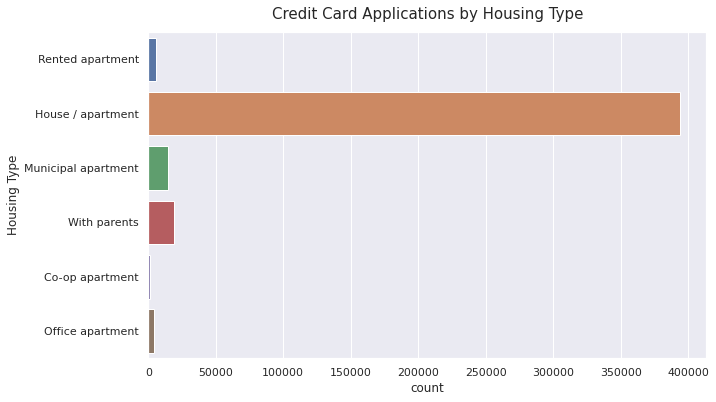

In [22]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(y='NAME_HOUSING_TYPE', data=df_applications)

plt.ylabel('Housing Type')
plt.title('Credit Card Applications by Housing Type', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Family Status

- NAME_FAMILY_STATUS

In [23]:
# value counts of family status
df_applications['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [24]:
# frequency table
family_status_freq = df_applications['NAME_FAMILY_STATUS'].value_counts().reset_index()

# rename cols
family_status_freq.rename(columns={'index': 'family_status',
                                    'NAME_FAMILY_STATUS': 'absolute_freq'}, inplace=True)

# absolute cummulative frequency
family_status_freq['abs_cum_freq'] = np.cumsum(family_status_freq.absolute_freq)

# relative frequency
family_status_freq['relative_freq'] = family_status_freq.absolute_freq / len(df_applications)

# relative cummulative frequency
family_status_freq['rel_cum_freq'] = np.cumsum(family_status_freq.relative_freq)

family_status_freq

,family_status,absolute_freq,abs_cum_freq,relative_freq,rel_cum_freq
0,Married,299828,299828,0.683669,0.683669
1,Single / not married,55271,355099,0.126029,0.809699
2,Civil marriage,36532,391631,0.083300,0.892999
3,Separated,27251,418882,0.062138,0.955137
4,Widow,19675,438557,0.044863,1.000000


- The Frequency Table above, shows us that 68.36% (299,828) of credit card applicants in the period analized are married while, 12.60% (55,271) of them are single. The remainig 19% (83,458) of credit card applicants are either in a civil marriage (8.3%), separated (6.2%) or widowed (4.4%). The Countplot below shows these difference between the applicants, in the period analyzed.

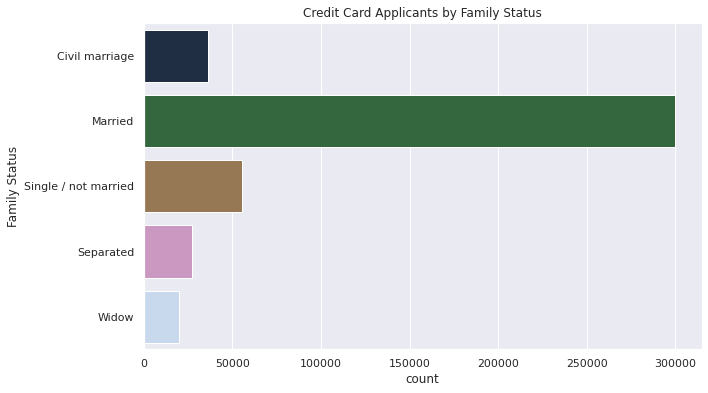

In [25]:
# plot
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(y='NAME_FAMILY_STATUS', data=df_applications, palette='cubehelix')

plt.ylabel('Family Status')
plt.title('Credit Card Applicants by Family Status')

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Quantitative Variables

#### Number of Family Members
 
- CNT_FAM_MEMBERS

In [26]:
# count of family members
df_applications['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [27]:
# turn into np array
x_fam_members = np.array(df_applications['CNT_FAM_MEMBERS'])

# mean
mean_fam_members = np.mean(x_fam_members)

# median 
median_fam_members = np.median(x_fam_members)

# standard dev
std_fam_members = np.std(x_fam_members)

# assymetry coefficient
skew_fam_members = skew(x_fam_members)


Mean: 2.19
Median: 2.00
Standard Deviation: 0.90
Assymetry Coefficient: 0.92 



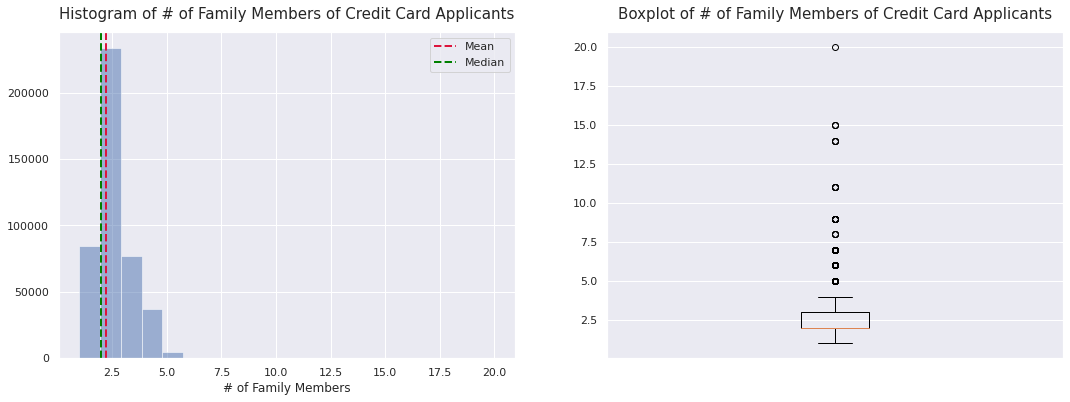

In [28]:
# print measures 
print(f'Mean: {mean_fam_members:.2f}')
print(f'Median: {median_fam_members:.2f}')
print(f'Standard Deviation: {std_fam_members:.2f}')
print(f'Assymetry Coefficient: {skew_fam_members:.2f}', '\n')

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
ax1.hist(x=x_fam_members, histtype='bar', bins=20, alpha=0.5)
# mean
ax1.axvline(x=mean_fam_members, color='crimson', lw=2, ls='dashed', label='Mean')
# median
ax1.axvline(x=median_fam_members, color='green', lw=2, ls='dashed', label='Median')

ax1.set_xlabel('# of Family Members')
ax1.legend()
ax1.set_title('Histogram of # of Family Members of Credit Card Applicants', pad=13, size=15)

# BOXPLOT
ax2.boxplot(x_fam_members)

ax2.set_xticks([])
ax2.set_title('Boxplot of # of Family Members of Credit Card Applicants', pad=13, size=15)

plt.show()

- As can be seen in the plots above, the Distribution of the *Number of Family Members* of Credit Card Applicants in the period analyzed, is *Right Skew* with a Positive Coefficient of Assymetry of 0.92. On Average, Credit Card Applicants have 2 family members 

- There is a Standard Deviation of 0.2, this means that on average the points are separated $\pm 0.2$ units from the Mean

- The Boxplot on the right shows us that 75% of the data is centered on the left side of the Distribution and there are a significant amount of Outliers

In [29]:
# 5 number summary
min, q1, q2, q3, max = np.quantile(x_fam_members, [0, 0.25, 0.50, 0.75, 1])

print(f'''5 Number Summary
  Min: {min:.2f},
  Q1: {q1:.2f},
  Q2: {q2:.2f},
  Q3: {q3:.2f},
  Max: {max:.2f}''')

5 Number Summary
  Min: 1.00,
  Q1: 2.00,
  Q2: 2.00,
  Q3: 3.00,
  Max: 20.00


- 50% of the Credit Card Applicants in the period analyzed, have between 1 to 2 family members

- 75% of the Credit Card Applicants in the period analyzed, have between 1 to 3 family members

- 25% of Applicants in the period analyzed have more than 3 family members

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Age

- DAYS_BIRTH

In [30]:
# create age column
df_applications['AGE'] = np.floor(df_applications['DAYS_BIRTH'] / -365)

# value counts of age
df_applications['AGE'].value_counts()

39.0    13576
38.0    13275
37.0    13095
41.0    13042
42.0    12901
27.0    12826
40.0    12748
32.0    12564
31.0    12369
28.0    12337
35.0    12327
43.0    12303
36.0    12298
29.0    11961
34.0    11912
33.0    11869
30.0    11611
44.0    11433
54.0    11035
46.0    10491
45.0    10439
48.0    10297
47.0    10039
51.0     9998
56.0     9927
53.0     9840
59.0     9780
52.0     9749
57.0     9560
50.0     9499
49.0     9301
58.0     9048
60.0     8755
55.0     8451
62.0     7854
61.0     7782
64.0     7281
63.0     7124
26.0     5723
25.0     4875
24.0     4098
23.0     3645
65.0     3237
22.0     2450
66.0     1992
67.0     1476
68.0      277
21.0       84
69.0        2
20.0        1
Name: AGE, dtype: int64

In [31]:
# create np array of age
x_age = np.array(df_applications['AGE'])

# mean
mean_age = np.mean(x_age)

# median
median_age = np.median(x_age)

# standard dev
std_age = np.std(x_age)

# assymetry coefficient
skew_age = skew(x_age)

Mean: 43.33
Median: 42.00
Standard Deviation: 11.47
Assymetry Coefficient: 0.16 



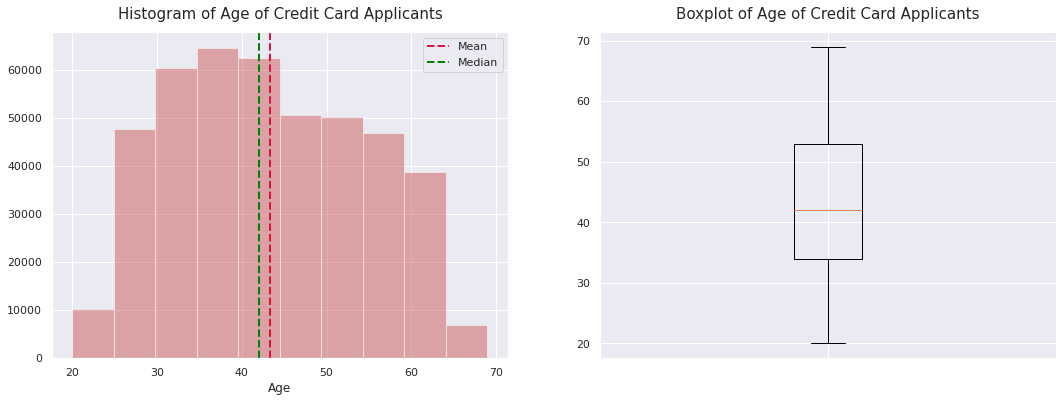

In [32]:
# print measures
print(f'Mean: {mean_age:.2f}')
print(f'Median: {median_age:.2f}')
print(f'Standard Deviation: {std_age:.2f}')
print(f'Assymetry Coefficient: {skew_age:.2f}','\n')

# plot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Histogram
ax1.hist(x=x_age, histtype='bar', color='indianred', alpha=0.5, bins=10)
# mean
ax1.axvline(x=mean_age, color='crimson', lw=2, ls='dashed', label='Mean')
# median
ax1.axvline(x=median_age, color='green', lw=2, ls='dashed', label='Median')

ax1.set_xlabel('Age')
ax1.legend()
ax1.set_title('Histogram of Age of Credit Card Applicants', pad=13, size=15)

# Boxplot
ax2.boxplot(x=x_age)
ax2.set_xticklabels([])
ax2.set_title('Boxplot of Age of Credit Card Applicants', pad=13, size=15)

plt.show()

- As can be seen in the plots above, the Distribution of the Age of Credit Card Applicants in the period analyzed tends to be symmetric with an Assymetry Coefficient of just 0.16

- AS the Boxplot shows us, there are no significant outliers. With that in mind we can say that the Average Age of Credit Card Applicants in the period analyzed is 43 years

  - There is a Standard Deviation of $± 11.47$, this means that on average an applicant is $\pm$ 11.47 years away from the Mean age

In [33]:
# 5 number summary
min, q1, q2, q3, max = np.quantile(x_age, [0, 0.25, 0.50, 0.75, 1])

print(f'''5 Number Summary
  Min: {min},
  Q1: {q1},
  Q2: {q2},
  Q3: {q3}
  Max: {max}''')

5 Number Summary
  Min: 20.0,
  Q1: 34.0,
  Q2: 42.0,
  Q3: 53.0
  Max: 69.0


- The Minimum age of the Credit Card Applicants, in the period analyzed, is 20 while the Maximum age is 69 years old

  - 25% of the Applicants are between 20 to 34 years old
  - 50% of Credit Card Applicants are at most 42 years old
  - 75% of the Applicants in the period analyzed are between 20 to 53 years old

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Years Employed

- DAYS_EMPLOYED

In [34]:
# descriptive statistics of Days_Employed
df_applications['DAYS_EMPLOYED'].describe()

count    438557.000000
mean      60563.675328
std      138767.799647
min      -17531.000000
25%       -3103.000000
50%       -1467.000000
75%        -371.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [35]:
# replace 365243 value for 0 
df_applications['DAYS_EMPLOYED'] = df_applications['DAYS_EMPLOYED'].replace(to_replace=365243, value=0)

# check changes
df_applications['DAYS_EMPLOYED'].describe()

count    438557.000000
mean      -2172.502516
std        2397.398738
min      -17531.000000
25%       -3103.000000
50%       -1467.000000
75%        -371.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [36]:
# create column YEARS_EMPLOYED = Days_Employed / -365
df_applications['YEARS_EMPLOYED'] = df_applications['DAYS_EMPLOYED'] / -365

# check descriptive statistics of new column
df_applications['YEARS_EMPLOYED'].describe()

count    438557.000000
mean          5.952062
std           6.568216
min          -0.000000
25%           1.016438
50%           4.019178
75%           8.501370
max          48.030137
Name: YEARS_EMPLOYED, dtype: float64

In [37]:
# create array of years employed 
x_years_employed = np.array(df_applications['YEARS_EMPLOYED'])

# mean
mean_years_emp = np.mean(x_years_employed)

# median
median_years_emp = np.median(x_years_employed)

# standard dev
std_years_emp = np.std(x_years_employed)

# assymetry coefficient
skew_years_emp = skew(x_years_employed)

# kurtosis
kurt_years_emp = kurtosis(x_years_employed)


Mean: 5.95
Median: 4.02
Standard Deviation: 6.57
Assymetry Coefficient: 1.80
Kurtosis: 3.93 



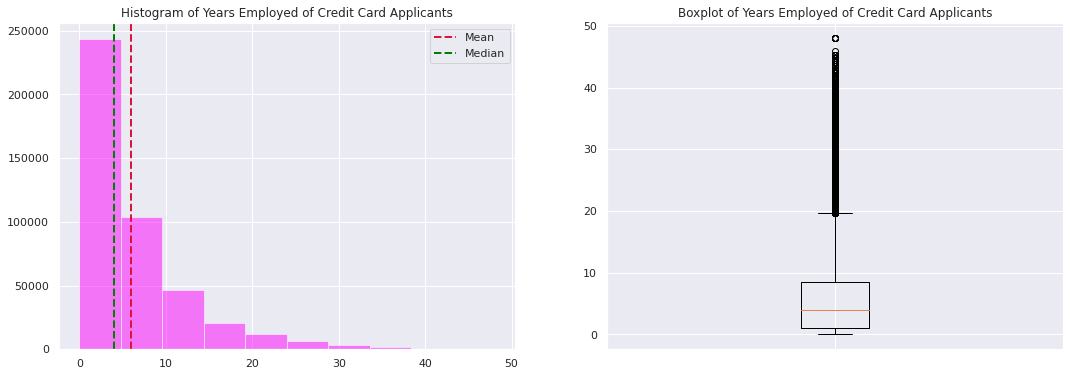

In [38]:
# print measures
print(f'Mean: {mean_years_emp:.2f}')
print(f'Median: {median_years_emp:.2f}')
print(f'Standard Deviation: {std_years_emp:.2f}')
print(f'Assymetry Coefficient: {skew_years_emp:.2f}')
print(f'Kurtosis: {kurt_years_emp:.2f}', '\n')

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
ax1.hist(x=x_years_employed, histtype='bar', color='magenta', alpha=0.5)
# mean
ax1.axvline(x=mean_years_emp, color='crimson', ls='dashed', lw=2, label='Mean')
# median
ax1.axvline(x=median_years_emp, color='green', ls='dashed', lw=2, label='Median')

ax1.legend()
ax1.set_title('Histogram of Years Employed of Credit Card Applicants')

# BOXPLOT
ax2.boxplot(x=x_years_employed)

ax2.set_xticklabels([])
ax2.set_title('Boxplot of Years Employed of Credit Card Applicants')


plt.show()

- As can be seen in the plots the distribution of the Years Employed of the Credit Card applicants in the period analyzed is Right Skew and has a strong Postive Assymetry with a Assymetry Coefficient of 1.80

  - With a Kurtosis value of 3.93 we can say the majority of the data is concentrated along 4.02 years of employed, which is the Median

  - The Boxplot shows us that there are a lot of outliers above the 20 years of employment which makes the distribution to be Right Skew. That being the case, we will use the Median of 4.02 as an indicative of the number of years of employment on average credit card applicants in the period analyzed have

- There is a Standard Deviation of $\pm6.57$ this means that, a credit card applicant is on average $\pm6.57$ years from the Mean years of employement of the group analyzed

In [39]:
# 5 number summary
min, q1, q2, q3, max = np.quantile(x_years_employed, [0, 0.25, 0.5, 0.75, 1])

print(f'''5 Number Summary
  Min: {min},
  Q1: {q1:.2f},
  Q2: {q2:.2f},
  Q3: {q3:.2f},
  Max: {max:.2f}''')

5 Number Summary
  Min: 0.0,
  Q1: 1.02,
  Q2: 4.02,
  Q3: 8.50,
  Max: 48.03


- Based on the 5 Number Summary we can say that:

  - 25% of the Credit Card Applicants in the period analyzed have at most 1.02 years of employment

  - 50% of Credit Card Applicants have between 0 and 4.02 years of employment

  - 75% of Credit Card Applicants in the period analyzed have at most 8.5 years of experience

  - 25% of Credit Card Applicants have between 8.5 and 48 years of employement

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Children

- CNT_CHILDREN

In [40]:
# vaule counts of CNT_CHILDREN
df_applications['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [41]:
# create np array of number of children of applicant
x_num_children = np.array(df_applications['CNT_CHILDREN'])

# mean
mean_num_children = np.mean(x_num_children)

# median
median_num_children = np.median(x_num_children)

# standard deviation
std_num_children = np.std(x_num_children)

# assymetry coefficient
skew_num_children = skew(x_num_children)

# kurtosis
kurt_num_children = kurtosis(x_num_children)


Mean: 0.43
Median: 0.00
Standard Deviation: 0.72
Assymetry Coefficient: 1.81
Kurtosis: 5.08 



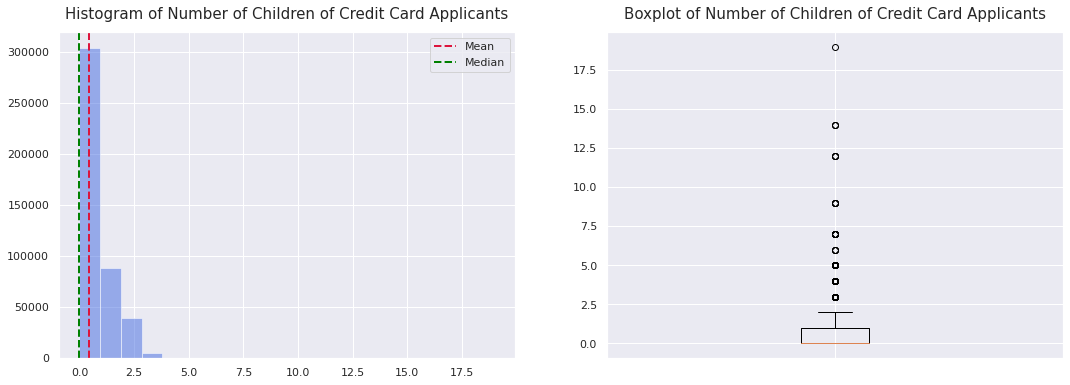

In [42]:
# print measures
print(f'Mean: {mean_num_children:.2f}')
print(f'Median: {median_num_children:.2f}')
print(f'Standard Deviation: {std_num_children:.2f}')
print(f'Assymetry Coefficient: {skew_num_children:.2f}')
print(f'Kurtosis: {kurt_num_children:.2f}', '\n')

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
ax1.hist(x=x_num_children, histtype='bar', color='royalblue', alpha=0.5, bins=20)
# mean
ax1.axvline(x=mean_num_children, color='crimson', ls='dashed', lw=2, label='Mean')
# median
ax1.axvline(x=median_num_children, color='green', ls='dashed', lw=2, label='Median')

ax1.legend()
ax1.set_title('Histogram of Number of Children of Credit Card Applicants', pad=13, size=15)

# BOXPLOT
ax2.boxplot(x=x_num_children)

ax2.set_xticklabels([])
ax2.set_title('Boxplot of Number of Children of Credit Card Applicants', pad=13, size=15)

plt.show()

- As can be seen in the plots above the Distribution of the Number of Children of Credit Card Applicants in the period analyzed, is Right Skew with and has a Positive Assymetry with an Assymetry Coefficient of 1.81

  - The Distribution has a Kurtosis of 5.08, this means that the majority of the data is in excess concentraded around 0, which is the Median

- Since the distribution is right skew and with a lot of Outliers after the Third Quartile, we can use the Median as a measure of central tendency. With that in mind, we can say that Credit Card Applicants in the period analyzed have on average 0 children.

- There is a Standard Deviation of $\pm0.72$, this means that a credit card applicant has on average $\pm0.72$ more or less children than the Mean number of children from the group analyzed

In [43]:
#  5 number summary
min, q1, q2, q3, max = np.quantile(x_num_children, [0, 0.25, 0.5, 0.75, 1])

print(f'''5 Number Summary
 Min: {min:.2f},
 Q1: {q1:.2f},
 Q2: {q2:.2f},
 Q3: {q3:.2f},
 Max: {max:.2f}''')

5 Number Summary
 Min: 0.00,
 Q1: 0.00,
 Q2: 0.00,
 Q3: 1.00,
 Max: 19.00


- 50% of the Credit Card Applicants in the period analyzed have 0 Children

- 75% of Credit Card Applicants in the period analyzed have 1 or less Children

- 25% of Credit Card Applicants have between 2 to 19 children. Having these number of children is atypical from the behavior of the rest of the group analyzed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### Annual Income

- AMT_INCOME_TOTAL

In [44]:
# value counts
df_applications['AMT_INCOME_TOTAL'].value_counts()

135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: AMT_INCOME_TOTAL, Length: 866, dtype: int64

In [45]:
# create numpy array
x_annual_income = np.array(df_applications['AMT_INCOME_TOTAL'])

# mean
mean_annual_income = np.mean(x_annual_income)

# median
median_annual_income = np.median(x_annual_income)

# standard deviation
std_annual_income = np.std(x_annual_income)

# assymetry coefficient
skew_annual_income = skew(x_annual_income)

# kurtosis
kurt_annual_income = kurtosis(x_annual_income)


Mean: 187524.29
Median: 160780.50
Standard Deviation: 110086.73
Assymetry Coefficient: 8.83
Kurtosis: 324.55 



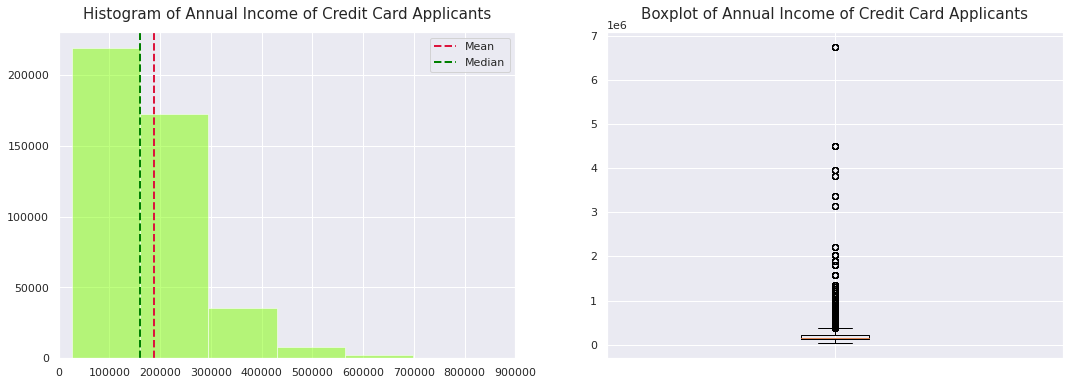

In [46]:
# print measures
print(f'Mean: {mean_annual_income:.2f}')
print(f'Median: {median_annual_income:.2f}')
print(f'Standard Deviation: {std_annual_income:.2f}')
print(f'Assymetry Coefficient: {skew_annual_income:.2f}')
print(f'Kurtosis: {kurt_annual_income:.2f}', '\n')

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
ax1.hist(x=x_annual_income, histtype='bar', color='chartreuse', alpha=0.5, bins=50)
# mean
ax1.axvline(x=mean_annual_income, color='crimson', ls='dashed', lw=2, label='Mean')
# median
ax1.axvline(x=median_annual_income, color='green', ls='dashed', lw=2, label='Median')

# set x lim between 0 and 900,000 USD
ax1.set_xlim(0, 900000)
ax1.legend()
ax1.set_title('Histogram of Annual Income of Credit Card Applicants', pad=13, size=15)

# BOXPLOT
ax2.boxplot(x=x_annual_income)

ax2.set_xticklabels([])
ax2.set_title('Boxplot of Annual Income of Credit Card Applicants', pad=13, size=15)


plt.show()

- As can be seen in the plots above, the Distribution of the Annual Income of Credit Card Applicants in the period analyzed is Right Skew with a Strong Positive Assymetry of 8.83. Its Kurtosis is greater than 0 which means, that the majority of the data is in excess concentrated around the Median $160,780.5 USD

  - There is a significant amount of Outliers, for that reason we should use the Median as a measure of Central Tendency.

- There is a Standard Deviation of $\pm 110,086$ this means, that a credit card applicant annual income is on average $110,086 USD more or less than the Mean annual income of the group analyzed 

In [47]:
# 5 number summary
min, q1, q2, q3, max = np.quantile(x_annual_income, [0, 0.25, 0.5, 0.75, 1])

print(f'''5 Number Summary
  Min: {min:.2f},
  Q1: {q1:.2f},
  Q2: {q2:.2f},
  Q3: {q3:.2f},
  Max: {max:.2f}''')

5 Number Summary
  Min: 26100.00,
  Q1: 121500.00,
  Q2: 160780.50,
  Q3: 225000.00,
  Max: 6750000.00


- 25% of Credit Card Applicants, in the period analyzed, have an annual income between $26,100 USD and 121,500 USD

- 50% of Credit Card Applicants have an annual income of at most $160,780 USD

- 75% of Credit Card Applicants, in the period analyzed, have an annual income between 26,100 USD and 225,000 USD

- 25% of Credit Card Applicants have an annual income greater than 225,000 USD and up to 6,750,000 USD. Having these annual incomes is atypical from the rest of the group analyzed

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Data Standarization and Encoding

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### *is_female*

- 67.13% of the credit card applicants in the period analyzed are female.

  - Encode 'CODE_GENDER' to a new feature *is_female*
    - 1: applicant is Female
    - 0: applicant is Male 

In [48]:
# create col is_female
df_applications['is_female'] = df_applications['CODE_GENDER'].apply(
    lambda x: 1 if x == 'F' else 0)

df_applications[['CODE_GENDER', 'is_female']]

,CODE_GENDER,is_female
0,M,0
1,M,0
2,M,0
3,F,1
4,F,1
...,...,...
438552,M,0
438553,F,1
438554,F,1
438555,F,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### *owns_car*

- 62.8% of credit card applicants in the period analyzed don't own a car

  - Encode 'FLAG_OWN_CAR' to a new feature *owns_car*
    - 0: applicant doesn't have a car
    - 1: applicant owns a car

In [49]:
# create col owns_car
df_applications['owns_car'] = df_applications['FLAG_OWN_CAR'].apply(
    lambda x: 0 if x == 'N' else 1)

df_applications[['FLAG_OWN_CAR', 'owns_car']]

,FLAG_OWN_CAR,owns_car
0,Y,1
1,Y,1
2,Y,1
3,N,0
4,N,0
...,...,...
438552,N,0
438553,N,0
438554,N,0
438555,N,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### *owns_realty*

- 69.3% of credit card applicants in the period analyzed own some type of realty

  - Encode 'FLAG_OWN_REALTY' to a new feature *owns_realty*

    - 1: applicant owns realty
    - 0: applicant doesn't own realty

In [50]:
# create new col owns_realty
df_applications['owns_realty'] = df_applications['FLAG_OWN_REALTY'].apply(
    lambda x: 1 if x == 'Y' else 0)

df_applications[['FLAG_OWN_REALTY', 'owns_realty']]

,FLAG_OWN_REALTY,owns_realty
0,Y,1
1,Y,1
2,Y,1
3,Y,1
4,Y,1
...,...,...
438552,Y,1
438553,N,0
438554,N,0
438555,Y,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### *income_from_work*

- 51.5% of credit card applicants said that their income came from work. Even though 22.9% of applicants said their income came from being a commercial associate and 8.2% from being a state servant, their income is coming from a work related activity

  - Encode 'NAME_INCOME_TYPE' to a new feature *income_from_work*

    - 1: income of applicant comes from work, commercial associate or state servant
    - 0: income of applicant doesn't come from work

In [51]:
# create new col income_from_work
df_applications['income_from_work'] = df_applications['NAME_INCOME_TYPE'].apply(
    lambda x: 1 if x not in ['Pensioner', 'Student'] else 0)

df_applications[['NAME_INCOME_TYPE', 'income_from_work']]

,NAME_INCOME_TYPE,income_from_work
0,Working,1
1,Working,1
2,Working,1
3,Commercial associate,1
4,Commercial associate,1
...,...,...
438552,Pensioner,0
438553,Working,1
438554,Commercial associate,1
438555,Pensioner,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### *is_professional*

- 26.7% of credit card applicants in the period analyzed are professionals

  - Encode NAME_EDUCATION_TYPE to a new feature *is_professional*

    - 1: if applicant has a higher education degree
    - 0: if applicant doesn't have a higher education degree 

In [52]:
# create new col is_professional
df_applications['is_professional'] = df_applications['NAME_EDUCATION_TYPE'].apply(
    lambda x: 1 if x == 'Higher education' else 0)

df_applications[['NAME_EDUCATION_TYPE', 'is_professional']]

,NAME_EDUCATION_TYPE,is_professional
0,Higher education,1
1,Higher education,1
2,Secondary / secondary special,0
3,Secondary / secondary special,0
4,Secondary / secondary special,0
...,...,...
438552,Secondary / secondary special,0
438553,Secondary / secondary special,0
438554,Higher education,1
438555,Secondary / secondary special,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *manager_or_high_skill_worker*

- 11.6% (35,487) of credit card applicants in the period analyzed are Managers and 5.6% (17,289) of them are High Skill workers. The rest of the applicants are either staff or normal level workers

  - Encode OCCUPATION_TYPE to a new_feature *manager_or_high_skill_worker*

    - 1: if applicant has a manager or high skill position
    - 0: if applicant doesn't have a manager or high skill position

In [53]:
# create new col manager_or_high_skill_worker
df_applications['manager_or_high_skill_worker'] = df_applications['OCCUPATION_TYPE'].apply(
    lambda x: 1 if x in ('High skill tech staff', 'Managers') else 0)


df_applications[['OCCUPATION_TYPE', 'manager_or_high_skill_worker']]

,OCCUPATION_TYPE,manager_or_high_skill_worker
0,NaN,0
1,NaN,0
2,Security staff,0
3,Sales staff,0
4,Sales staff,0
...,...,...
438552,NaN,0
438553,Laborers,0
438554,Sales staff,0
438555,NaN,0


In [54]:
# check with value_counts
df_applications.manager_or_high_skill_worker.value_counts()

0    385781
1     52776
Name: manager_or_high_skill_worker, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *lives_in_own_house*

- 89.8% of credit card applicants in the period analyzed live in their own house or apartment

  - Encode 'NAME_HOUSING_TYPE' to a new feature *lives_in_own_house*

    - 1: if applicant lives in his own house or apartment
    - 0: if applicant doesn't live in his own house or apartment

In [55]:
# create new col lives_in_own_house
df_applications['lives_in_own_house'] = df_applications['NAME_HOUSING_TYPE'].apply(
    lambda x: 1 if x == 'House / apartment' else 0)


df_applications[['NAME_HOUSING_TYPE', 'lives_in_own_house']]

,NAME_HOUSING_TYPE,lives_in_own_house
0,Rented apartment,0
1,Rented apartment,0
2,House / apartment,1
3,House / apartment,1
4,House / apartment,1
...,...,...
438552,House / apartment,1
438553,House / apartment,1
438554,With parents,0
438555,House / apartment,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *is_married*

- 76% of credit card applicants in the period analyzed are married

  - Encode NAME_FAMILY_STATUS to a new feature *is_married*

    - 1: if applicant is married
    - 0: if applicant isn't married

In [56]:
# create new feature is_married
df_applications['is_married'] = df_applications['NAME_FAMILY_STATUS'].apply(
    lambda x: 1 if x in ('Civil marriage', 'Married') else 0)

df_applications[['NAME_FAMILY_STATUS', 'is_married']]

,NAME_FAMILY_STATUS,is_married
0,Civil marriage,1
1,Civil marriage,1
2,Married,1
3,Single / not married,0
4,Single / not married,0
...,...,...
438552,Separated,0
438553,Single / not married,0
438554,Single / not married,0
438555,Married,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *have_children*

- 75% of credit card applicants in the period analyzed have at most 1 children

  - Encode CNT_CHILDREN to a new feature *have_children*

    - 1: if applicant has children
    - 0: if applicant doesn't have children

    

In [57]:
# create new col have_children
df_applications['have_children'] = df_applications['CNT_CHILDREN'].apply(
    lambda x: 1 if x >= 1 else 0)

df_applications[['CNT_CHILDREN', 'have_children']].value_counts()

CNT_CHILDREN  have_children
0             0                304071
1             1                 88527
2             1                 39884
3             1                  5430
4             1                   486
5             1                   133
7             1                     9
9             1                     5
6             1                     4
12            1                     4
14            1                     3
19            1                     1
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *one_or_more_years_employed*

- 75% of credit card applicants in the period analyzed have at least 1.02 years employed

  - Encode YEARS_EMPLOYED to a new feature *one_or_more_years_employed*

In [58]:
# create new col one_or_more_years_employed
df_applications['one_or_more_years_employed'] = df_applications['YEARS_EMPLOYED'].apply(
    lambda x: 1 if x >= 1 else 0)

df_applications[['YEARS_EMPLOYED', 'one_or_more_years_employed']]

,YEARS_EMPLOYED,one_or_more_years_employed
0,12.443836,1
1,12.443836,1
2,3.106849,1
3,8.358904,1
4,8.358904,1
...,...,...
438552,-0.000000,0
438553,8.238356,1
438554,1.019178,1
438555,-0.000000,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *age_norm*

- The *Age* feature is going to be **Normalized** because it is in a different scale with respect to the other features that are going to be used to build the model

<br>

$$ Normalization = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [59]:
# create age array
x_age = np.array(df_applications['DAYS_BIRTH']) / -365
x_age = np.floor(x_age)

# min age
min_age = np.min(x_age)
# max age
max_age = np.max(x_age)

# MinMax Normalization
x_age_norm = (x_age - min_age) / (max_age - min_age) 

In [60]:
# create new col age_norm
df_applications['age_norm'] = x_age_norm

df_applications['age_norm'].describe()

count    438557.000000
mean          0.476051
std           0.234031
min           0.000000
25%           0.285714
50%           0.448980
75%           0.673469
max           1.000000
Name: age_norm, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *at_most_two_family_members*

- 50% of credit card applicants in the period analyzed have at most 2 family members living with them

  - Encode CNT_FAM_MEMBERS to a new feature *at_most_two_family_members*

    - 1: if applicants has at most 2 family members
    - 0: if applicant has more than 2 family members living with him

In [61]:
# create new col at_most_two_family_members
df_applications['at_most_two_family_members'] = df_applications['CNT_FAM_MEMBERS'].apply(
    lambda x: 1 if x <= 2 else 0)

df_applications[['CNT_FAM_MEMBERS', 'at_most_two_family_members']].value_counts()

CNT_FAM_MEMBERS  at_most_two_family_members
2.0              1                             233891
1.0              1                              84492
3.0              0                              77128
4.0              0                              37356
5.0              0                               5081
6.0              0                                459
7.0              0                                124
9.0              0                                  9
11.0             0                                  5
8.0              0                                  4
14.0             0                                  4
15.0             0                                  3
20.0             0                                  1
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### *at_most_median_income*

- 50% of credit card applicants in the period analyzed have an annual income of at most \$160,780.50 USD

  - Encode AMT_INCOME_TOTAL to a new feature *at_most_median_income*

    - 1: if applicant has an annual income of at most \$160,780.5 USD
    - 0: if applicant earns more than the median annual income

In [62]:
# create new col at_most_median_income
df_applications['at_most_median_income'] = df_applications['AMT_INCOME_TOTAL'].apply(
    lambda x: 1 if x <= 160780.5 else 0)


df_applications[['AMT_INCOME_TOTAL', 'at_most_median_income']]

,AMT_INCOME_TOTAL,at_most_median_income
0,427500.0,0
1,427500.0,0
2,112500.0,1
3,270000.0,0
4,270000.0,0
...,...,...
438552,135000.0,1
438553,103500.0,1
438554,54000.0,1
438555,72000.0,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Encoded Features DataFrame

In [63]:
# create df of encoded features
df_appli_encod = df_applications[['ID', 'is_female', 'owns_car', 'owns_realty', 'income_from_work',
                                  'is_professional', 'manager_or_high_skill_worker', 'lives_in_own_house',
                                  'is_married', 'have_children', 'one_or_more_years_employed', 'age_norm',
                                  'at_most_two_family_members', 'at_most_median_income']]

df_appli_encod

,ID,is_female,owns_car,owns_realty,income_from_work,is_professional,manager_or_high_skill_worker,lives_in_own_house,is_married,have_children,one_or_more_years_employed,age_norm,at_most_two_family_members,at_most_median_income
0,5008804,0,1,1,1,1,0,0,1,0,1,0.244898,1,0
1,5008805,0,1,1,1,1,0,0,1,0,1,0.244898,1,0
2,5008806,0,1,1,1,0,0,1,1,0,1,0.775510,1,1
3,5008808,1,0,1,1,0,0,1,0,0,1,0.653061,1,0
4,5008809,1,0,1,1,0,0,1,0,0,1,0.653061,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,0,0,1,0,0,0,0.857143,1,1
438553,6840222,1,0,0,1,0,0,1,0,0,1,0.469388,1,1
438554,6841878,1,0,0,1,1,0,0,0,0,1,0.040816,1,1
438555,6842765,1,0,1,0,0,0,1,1,0,0,0.795918,1,1


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Credit Record

- Based on the Credit Record of the clients in the financial institution analyzed, clients will be labeled as *good* or *bad* based on their payment behavior.

<br>

- The Credit Record Dataset contains the following features:

  - ID: client number

  - MONTHS_BALANCE: the month of the extracted data
    - 0 is the current month, -1 is the previous month

  - STATUS: the status of loans of a client
    - 0: 1 - 29 days past due
    - 1: 30 - 59 days past due
    - 2: 60 - 89 days overdue
    - 3: 90 - 119 days overdue
    - 4: 120 - 149 days overdue
    - 5: Overdue for more than 150 days
    - C: paid off that month
    - X: no loan for the month
  



In [64]:
# check credit records
df_credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [65]:
# check record of client 5150487
df_credit_record[df_credit_record.ID == 5150487]

,ID,MONTHS_BALANCE,STATUS
1048545,5150487,0,C
1048546,5150487,-1,C
1048547,5150487,-2,C
1048548,5150487,-3,C
1048549,5150487,-4,C
1048550,5150487,-5,C
1048551,5150487,-6,C
1048552,5150487,-7,C
1048553,5150487,-8,C
1048554,5150487,-9,C


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

###  Credit Record for Last Three Months

- For a Credit Card to be approved the client needs:
 
 - *C:* To have payed his loans on time for the last three months
 - *X:* Have No loan payments to pay during this period

In [66]:
# reshape df >> columns = MONTHS_BALANCE
df_credit_wide = pd.pivot(df_credit_record, index='ID', columns='MONTHS_BALANCE', values='STATUS')

# select the last 3 months records
df_credit_wide = df_credit_wide[[-2, -1, 0]].reset_index()

# set Index to None
df_credit_wide = df_credit_wide.rename_axis(None, axis=1)

# rename columns
df_credit_wide = df_credit_wide.rename(columns={-2: 'two_month',
                                                -1: 'one_month',
                                                 0: 'current_month'})

df_credit_wide

,ID,two_month,one_month,current_month
0,5001711,0,0,X
1,5001712,C,C,C
2,5001713,X,X,X
3,5001714,X,X,X
4,5001715,X,X,X
...,...,...,...,...
45980,5150482,NaN,NaN,NaN
45981,5150483,X,X,X
45982,5150484,0,0,C
45983,5150485,NaN,0,0


In [67]:
# check unique values of ID column
df_credit_wide.ID.unique

<bound method Series.unique of 0        5001711
1        5001712
2        5001713
3        5001714
4        5001715
          ...   
45980    5150482
45981    5150483
45982    5150484
45983    5150485
45984    5150487
Name: ID, Length: 45985, dtype: int64>

- There are $45,985$ Unique Clients who have a *Credit Record History* in the financial institution analyzed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### *Card_Approved* Label

- If a Client has paid its financial products in the last three months or didn't have any loan payments because he has already pay them he is eligible for a Credit Card

  - 1: Approval of Credit Card
  - 0: Credit Card Declined

In [68]:
# create card_approved column
df_credit_wide['card_approved'] = np.where((df_credit_wide['two_month'] == 'C') | (df_credit_wide['two_month'] == 'X')\
                                           |(df_credit_wide['one_month'] == 'C') | (df_credit_wide['one_month'] == 'X')\
                                           |(df_credit_wide['current_month'] == 'C') | (df_credit_wide['current_month'] == 'X'),
                                           1, 0)

df_credit_wide

,ID,two_month,one_month,current_month,card_approved
0,5001711,0,0,X,1
1,5001712,C,C,C,1
2,5001713,X,X,X,1
3,5001714,X,X,X,1
4,5001715,X,X,X,1
...,...,...,...,...,...
45980,5150482,NaN,NaN,NaN,0
45981,5150483,X,X,X,1
45982,5150484,0,0,C,1
45983,5150485,NaN,0,0,0


In [69]:
# value_counts of card_approved
cards_approved = df_credit_wide['card_approved'].value_counts().reset_index()

# rename columns 
cards_approved.rename(columns={'index': 'card_approved',
                               'card_approved': 'num_clients'}, inplace=True)

# create col %_clients
cards_approved['%_clients'] = cards_approved.num_clients / len(df_credit_wide)

cards_approved

,card_approved,num_clients,%_clients
0,1,26783,0.582429
1,0,19202,0.417571


- As can be seen in the table above, 58.24% (26,783) of clients, with a Credit Record history in the financial institution analyzed, will have a Credit Card Approved based on their loan payments of the last 3 month. On the other hand, 41.75% (19,202) of them will have a Credit Card Denied due to their non payment of their loan obligations in the last 3 months

In [70]:
# create df with ID and card_approved
df_credit = df_credit_wide[['ID', 'card_approved']]

df_credit

,ID,card_approved
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
...,...,...
45980,5150482,0
45981,5150483,1
45982,5150484,1
45983,5150485,0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Merging Dataframes

- An Inner Join is goig to be performed between the `df_appli_encod` and the `df_credit` DataFrames

  - Both DataFrames will be Merged on the ID column which is the unique identitifier of the client

  - The Resulting DataFrame will have the features of the client and also, if he has a Credit Card Approved. With this we are going to build a Machine Learning Model that predicts if a customer, based on its application features, will have a Credit Card Approved

In [71]:
# merge_dfs >> Inner Join
df_appli_labels = pd.merge(df_appli_encod, df_credit, on='ID', how='inner')

df_appli_labels

,ID,is_female,owns_car,owns_realty,income_from_work,is_professional,manager_or_high_skill_worker,lives_in_own_house,is_married,have_children,one_or_more_years_employed,age_norm,at_most_two_family_members,at_most_median_income,card_approved
0,5008804,0,1,1,1,1,0,0,1,0,1,0.244898,1,0,1
1,5008805,0,1,1,1,1,0,0,1,0,1,0.244898,1,0,1
2,5008806,0,1,1,1,0,0,1,1,0,1,0.775510,1,1,1
3,5008808,1,0,1,1,0,0,1,0,0,1,0.653061,1,0,1
4,5008809,1,0,1,1,0,0,1,0,0,1,0.653061,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,1,1,1,0,1,1,1,0,1,0.551020,1,0,0
36453,5149834,1,0,1,1,1,0,1,1,0,1,0.265306,1,1,1
36454,5149838,1,0,1,0,1,0,1,1,0,1,0.265306,1,1,1
36455,5150049,1,0,1,1,0,0,1,1,0,1,0.591837,1,0,0


In [72]:
# check that ID values are Unique
len(df_appli_labels.ID.unique())

36457

- There are $36,457$ clients that have some type of loan product with the bank and that have applied for a Credit Card.

  - Based on the history of their credit record payment in the last three months they will have the Credit Card approved or denied

    - *1: Credit Card Approved based on last three months loan payments*

    - *0: Credit Card Denied based on last three months loan payment*

In [73]:
# value_counts of cards_pre_approved
cards_pre_approved = df_appli_labels.card_approved.value_counts().reset_index()

# rename cols
cards_pre_approved.rename(columns={'index': 'card_approved',
                                   'card_approved': 'num_clients'}, inplace=True)

# %_approval
cards_pre_approved['%_approval'] = cards_pre_approved.num_clients / len(df_appli_labels)

cards_pre_approved

,card_approved,num_clients,%_approval
0,1,19235,0.527608
1,0,17222,0.472392


-  As we can see in the Frequency Table above, 52.7% (19,235) of credit card applicants in the period analyzed had their card approved. Meanwhile, 47.2% (17,222) of applicants had their credit card application declined

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Model Creation

- A Logistic Model is going to be used to classify credit card applicants, based on their traits, in two groups:

  - $0 = $ Credit Card Denied
  - $1 = $ Credit Card Approved

    - $f_{w, b}(x) < 0.5 ⟶ \hat{y} = 0$
    - $f_{w, b}(x) > 0.5 ⟶ \hat{y} = 1$

<br>

- The *Sigmoid Function* maps all Input values Between 0 and 1

  <br>

  $$  g(z) = \frac{1}{1 + e^{-z}} $$
  <br>
  $$ z = \vec{w} . \vec{x} + b $$
  <br>
  $$ f_{w, b} = g(\vec{w} . \vec{x} + b) = \frac{1}{1 + e^{-(\vec{w}. \vec{x}  + b)}} $$




![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Inputs

In [74]:
# check column names of df_appli_labels
df_appli_labels.columns

Index(['ID', 'is_female', 'owns_car', 'owns_realty', 'income_from_work',
       'is_professional', 'manager_or_high_skill_worker', 'lives_in_own_house',
       'is_married', 'have_children', 'one_or_more_years_employed', 'age_norm',
       'at_most_two_family_members', 'at_most_median_income', 'card_approved'],
      dtype='object')

In [75]:
# create inputs df
df_inputs = df_appli_labels[['is_female', 'owns_car', 'owns_realty', 'income_from_work',
       'is_professional', 'manager_or_high_skill_worker', 'lives_in_own_house',
       'is_married', 'have_children', 'one_or_more_years_employed', 'age_norm',
       'at_most_two_family_members', 'at_most_median_income']] 

df_inputs.columns

Index(['is_female', 'owns_car', 'owns_realty', 'income_from_work',
       'is_professional', 'manager_or_high_skill_worker', 'lives_in_own_house',
       'is_married', 'have_children', 'one_or_more_years_employed', 'age_norm',
       'at_most_two_family_members', 'at_most_median_income'],
      dtype='object')

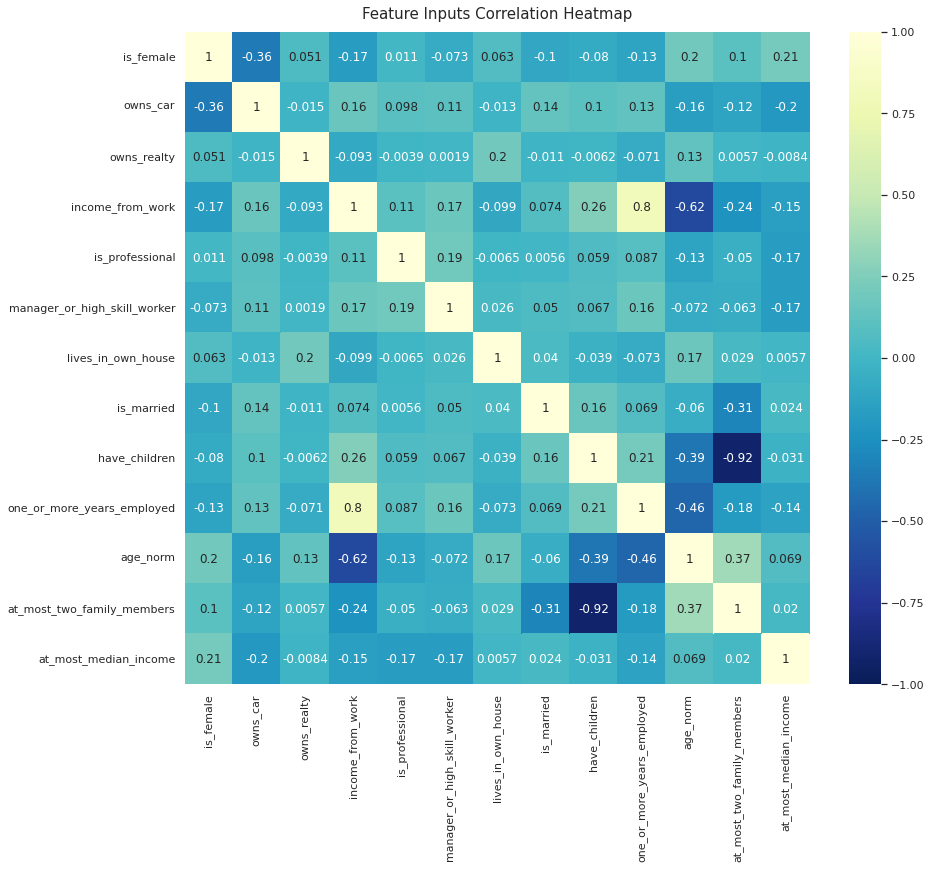

In [76]:
# Features Correlation
fig, ax = plt.subplots(figsize=(14, 12))

# Correlation Heatmap
sns.heatmap(df_inputs.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Feature Inputs Correlation Heatmap', pad=13, size=15)

plt.show()

- As can be seen in the Correlation Heatmap above there is none or little *Multicolinearity* between the features except for:

  - *have_children* and *at_most_two_family_members* have a correlation of $-0.92$ meaning that these two independent features are strongly correlated.

    - If the credit card applicant has children there is a high probability that he lives with at most two family members

  - *income_from_work* and *one_or_more_years_employed* have a correlation of $0.8$ meaning that these two independent features are strongly correlated

    - If the income from a credit card applicant comes from work there is a high probability that he has one or more years of being employed

  - *age_norm* and *income_from_work* have a negative correaltion of $-0.62$ meaning that these two features are correlated

    - The higher the age of the applicant the least likely that its income come from work

<br>

- The features of *at_most_two_family_members*, *age_norm* and *one_or_more_years_employed* are not going to be used in the Model to avoid less reliable statistical inferences



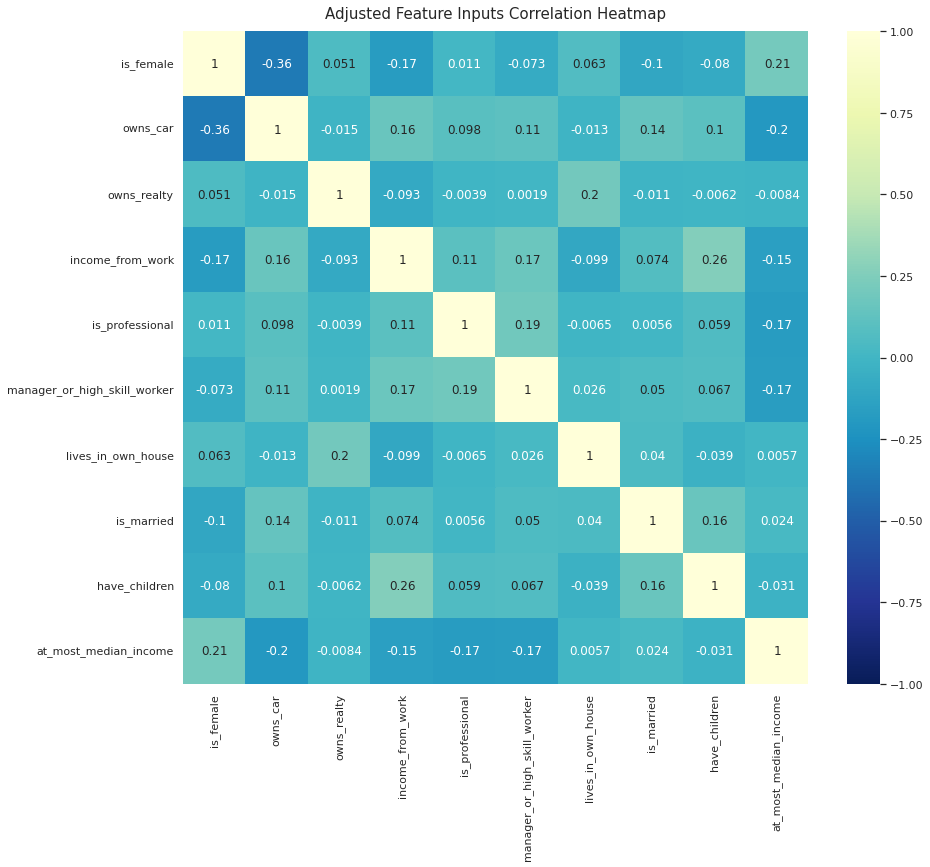

In [77]:
# remove features from df_inputs
df_inputs = df_inputs[['is_female', 'owns_car', 'owns_realty', 'income_from_work',
       'is_professional', 'manager_or_high_skill_worker', 'lives_in_own_house',
       'is_married', 'have_children','at_most_median_income']]

# correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(df_inputs.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Adjusted Feature Inputs Correlation Heatmap', pad=13, size=15)

plt.show()

- As can be seen in the adjusted Correlation Heatmap above, there is none or little *Multicolinearity* between the input features, which make them suitable to create a Prediction Model 

In [78]:
# create inputs numpy array
x_inputs = np.array(df_inputs)


print(f'x_inputs Shape: {x_inputs.shape}', '\n')

print('First 5 Rows:')
x_inputs[0:5, :]

x_inputs Shape: (36457, 10) 

First 5 Rows:


array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 0]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Labels


In [79]:
# create df with client ID and labels
df_labels = df_appli_labels[['ID', 'card_approved']]

df_labels

,ID,card_approved
0,5008804,1
1,5008805,1
2,5008806,1
3,5008808,1
4,5008809,0
...,...,...
36452,5149828,0
36453,5149834,1
36454,5149838,1
36455,5150049,0


In [80]:
# create numpy array
y_labels = np.array(df_labels['card_approved'])


print(f'y_labels shape: {y_labels.shape}', '\n')

print('First 100 Rows:')
print(y_labels[:100])


y_labels shape: (36457,) 

First 100 Rows:
[1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Train and Test Split

In [81]:
# import train_test_split
from sklearn.model_selection import train_test_split 

# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(x_inputs, y_labels, test_size=0.3, 
                                                    random_state=100)

# check X_train and y_train
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}', '\n')

# check X_test and y_test
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (25519, 10)
y_train shape: (25519,) 

X_test shape: (10938, 10)
y_test shape: (10938,)


In [82]:
# initial values for w and b
b_init = 1.5
w_init = np.array([1.5, 1.8, 2, 2.3, 1.7, 1.2, 2.1, 1.4, 1.2, 1.4])

print(f'w_init shape: {w_init.shape}')

w_init shape: (10,)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Cost Function $J$

- The Loss Function *measures how well you are doing in one training example* and in Logistic Regression it uses two separate curves, one when $y^{(i)} = 1$ and other when $y^{(i)} = 0$.

  - The Combined Curves are similar to the Quadratic Curve of the *Squared Error Loss*, allowing them to be suitable for *Gradient Descent*
    - No Plateaus
    - No Local Minimums
    - No Discontinuities

<br>

- $Loss(f(x^{(i)}), y^{(i)}) = $

  - $-\log(f(x^{(i)}) ⟶ y^{(i)} = 1$
  - $-\log(1 - f(x^{(i)})) ⟶ y^{(i)} = 0$

<br>

$$ Loss(f(x^{(i)}), y^{(i)}) = (-y^{(i)} \log(f(x^{(i)})) - (1 - y^{(i)}) \log(1 - f(x^{(i)}))  $$

<br>

- The Cost Function $J$ is given by the following formula:

<br>

$$ J(\vec{w}, b) = \frac{1}{m} \sum_{i=1}^{m} Loss(f(x^{(i)}), y^{(i)}) $$

  <br>

- $\vec{w}$ is a vector of the 10 Weight Features that are going to be used in the model 

  - $b$ is a scalar

  <br>

  $$ f(x) = w_1x_1 + w_2x_2 + ... + w_nx_x + b $$
  <br>
  $$ f(x) = \vec{w} . x + b $$

In [83]:
# function to calculate cost
def calculate_cost(x, y, w, b):

  # number of rows
  m = x.shape[0]

  # var to store cost
  cost = 0

  for i in range(m):
    # calculate y_hat for ith row
    y_hat = np.dot(w, x[i]) + b
    # calculate sigmoid of y_hat
    sigmoid_z = 1 / (1 + np.exp(-y_hat))
    # calculate error(loss) for ith row
    error = (-y[i] * np.log(sigmoid_z)) - ((1 - y[i]) * np.log(1 - sigmoid_z))
    # add error of ith row to cost
    cost += error

  # cost / m
  cost = cost / m

  return cost

In [84]:
# test calculate_cost with initial params
test_cost = calculate_cost(X_train, y_train, w_init, b_init)

test_cost

5.282451005442224

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Gradient of $\vec{w}$ and $b$

- The Derivatives are the same as in *Linear Regression* BUT the IMPLEMENTATION of $f(\vec{x})$ is different in each one of them 

<br>

$$ J(\vec{w}, b) = \frac{1}{2m} \sum (\hat{y}^{(i)} - y^{(i)})^2 $$
<br>
$$ u = \hat{y}^{(i)} - y^{(i)} $$
<br>
$$ \hat{y}^{(i)} = \vec{w}*x^{(i)} + b  $$
<br>
$$ J(\vec{w}, b) = \frac{1}{2m} \sum u^2 $$

<br>

- Partial Derivative of $J$ with respect to $\vec{w}_{j}$
  - $\vec{w}_{j} = [1, 2, 3, ..., n]$
    - $n = $ number of features (columns)

  <br>

  $$ \frac{\partial J}{\partial \vec{w}_{j}} = \frac{\partial J}{\partial u} \frac{\partial u}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \vec{w}_j}  $$

  <br>

  - $ \frac{\partial \hat{y}}{\partial \vec{w}_j} (\vec{w}_j * x^{(i)} + b) = x^{(i)} $

  <br>

  - $ \frac{\partial u}{\partial \hat{y}} (\hat{y}^{(i)} - y^{(i)}) = 1 $

  <br>

  - $\frac{\partial J}{\partial u} (\frac{1}{2m} \sum u^2) = \frac{1}{m} \sum u  $

  <br>

  $$ \frac{\partial J}{\partial \vec{w}_{j}} = \frac{1}{m} \sum (\hat{y}^{(i)} - y^{(i)}) * x_{j}^{(i)} $$

  <br>

- Partial Derivative of $J$ with respect to $b$
  - $b$ is a scalar

  <br>

  $$ \frac{\partial J}{\partial b} = \frac{\partial J}{\partial u} \frac{\partial u}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b}  $$

  <br>

  - $ \frac{\partial \hat{y}}{\partial b} (\vec{w}_j * x^{(i)} + b) = 1 $

  <br>

  - $ \frac{\partial u}{\partial \hat{y}} (\hat{y}^{(i)} - y^{(i)}) = 1 $

  <br>

  - $ \frac{\partial J}{\partial u} (\frac{1}{2m} \sum u^2) = \frac{1}{m} \sum u $

  <br>

  $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum (\hat{y}^{(i)} - y^{(i)}) $$

In [85]:
# function to calculate gradient
def calculate_gradient(x, y, w, b):

  # var m, n
  m, n = x.shape

  # var to store gradients
  dJ_dw = np.zeros((n, )) # np array of size n
  dJ_db = 0

  for i in range(m):
    # calculate y_hat for ith row
    y_hat = np.dot(w, x[i]) + b
    # calculate sigmoid of y_hat
    sigmoid_z = 1 / (1 + np.exp(-y_hat))
    # calculate error(loss) for ith row
    error = sigmoid_z - y[i] 

    for j in range(n):
      # calculate dJ_dw at jth position
      dJ_dw[j] += error * x[i, j]

    # calculate dJ_db
    dJ_db += error

  # divide gradients by 1/m
  dJ_dw /= m
  dJ_db /= m

  return dJ_dw, dJ_db


In [86]:
# test calculate_gradient with inital params
test_dJ_dw, test_dJ_db = calculate_gradient(X_train, y_train, w_init, b_init)

print(f'Test dJ_dw: {test_dJ_dw} \n')
print(f'Test dJ_db: {test_dJ_db}')

Test dJ_dw: [0.3222036  0.18090394 0.3255226  0.39514296 0.12750234 0.05763996
 0.4226156  0.36334251 0.15140218 0.24092434] 

Test dJ_db: 0.47401747538473277


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Gradient Descent

- Repeat Until Convergence

<br>

$$  w_j = w_j - \alpha \frac{\partial J}{\partial w_j}  $$

<br>

$$  b = b - \alpha \frac{\partial J}{\partial b}  $$

In [87]:
import math
import copy


# function to calculate gradient descent
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, calculate_cost, calculate_gradient):

  '''Function that calculates Batch Gradient Descent
     to find the best w and b that minimizes cost J'''

  # initialize w and b
  w = copy.deepcopy(w_init)
  b = b_init

  # list to store historic cost
  historic_cost = []

  # for every iteration
  for i in range(num_iter):
    # calculate gradients
    dJ_dw, dJ_db = calculate_gradient(x, y, w, b)

    # update params
    w = w - alpha * dJ_dw
    b = b - alpha * dJ_db

    # calculate cost 
    if i < 100000: # prevent resource exhaustion
      cost = calculate_cost(x, y, w, b)
      historic_cost.append(cost)


    # Print Iteration, Cost, dJ_dw, w, dJ_db, b every 100 iterations
    if math.ceil(i % 10) == 0:
      print(f'Iteration: {i}, Cost: {cost:.4f}')

  return w, b, historic_cost


In [117]:
# calculate gradient descent

# set number of iterations and alpha
num_iter = 200
alpha = 0.1

# Find best w, b that Minimize Cost
w, b, historic_cost = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iter, calculate_cost, calculate_gradient)



Iteration: 0, Cost: 5.1790
Iteration: 10, Cost: 4.1454
Iteration: 20, Cost: 3.1176
Iteration: 30, Cost: 2.1224
Iteration: 40, Cost: 1.2917
Iteration: 50, Cost: 0.8795
Iteration: 60, Cost: 0.7826
Iteration: 70, Cost: 0.7631
Iteration: 80, Cost: 0.7552
Iteration: 90, Cost: 0.7493
Iteration: 100, Cost: 0.7441
Iteration: 110, Cost: 0.7395
Iteration: 120, Cost: 0.7353
Iteration: 130, Cost: 0.7316
Iteration: 140, Cost: 0.7282
Iteration: 150, Cost: 0.7252
Iteration: 160, Cost: 0.7225
Iteration: 170, Cost: 0.7201
Iteration: 180, Cost: 0.7179
Iteration: 190, Cost: 0.7159


In [119]:
# w that minimize the cost
print('Best w:')
for i in zip(list(df_inputs.columns), w):
  print(i)

print('\n')
# b that minimizes the cost
print(f'Best b: {b:.4f}', '\n')

# cost
print(f'Cost: {historic_cost[-1]:.4f}')

Best w:
('is_female', 0.07453248799841855)
('owns_car', 0.3770467387131387)
('owns_realty', 0.1580438546083427)
('income_from_work', 0.18764544401512565)
('is_professional', 0.5070896170196589)
('manager_or_high_skill_worker', 0.571243295241505)
('lives_in_own_house', 0.09294363542139009)
('is_married', -0.20869796091058895)
('have_children', 0.1194181061881644)
('at_most_median_income', 0.3121801290154296)


Best b: -0.7109 

Cost: 0.7142


- The features with the Highest Influence in Classifying a Credit Card Application as Approved (1) are:

  - **manager_or_high_skill_worker** with a coefficient of 0.42
  - **is_professional** with a coefficient of 0.32
  - **owns_car** with a coefficient of 0.37

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Cost vs Iterations

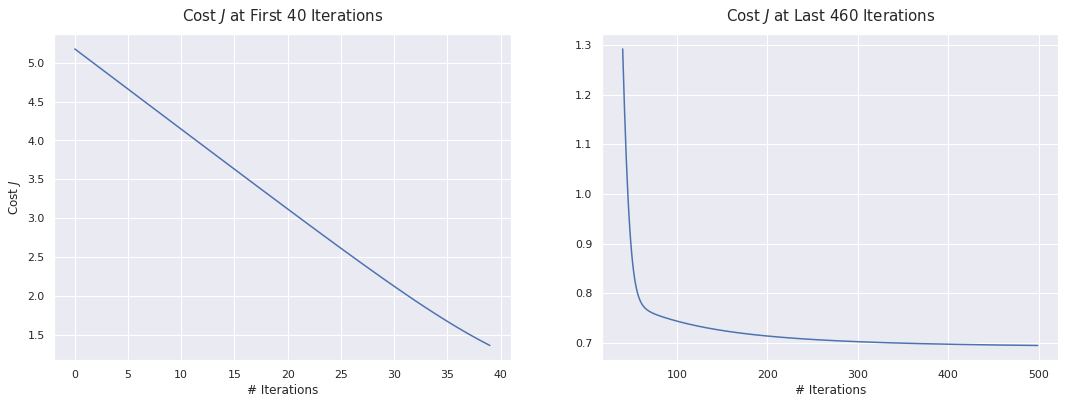

In [104]:
# plot cost vs iterations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# first 40 iterations
ax1.plot(np.arange(40), historic_cost[:40])

ax1.set_xlabel('# Iterations')
ax1.set_ylabel('Cost $J$')
ax1.set_title('Cost $J$ at First 40 Iterations', pad=13, size=15)

# last 160 iterations
ax2.plot(40 + np.arange(160), historic_cost[40:])

ax2.set_xlabel('# Iterations')
ax2.set_title('Cost $J$ at Last 160 Iterations', pad=13, size=15)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Predictions

In [106]:
# function that predicts credit card approval
def predictions(x, y, w, b):

  # store m
  m = x.shape[0]
  # array to store predictions
  predict_array = np.zeros((m, ))

  for i in range(m):
    # calculate y_hat for ith row
    y_hat = np.dot(w, x[i]) + b
    # calculate sigmoid_z for ith row
    sigmoid_z = 1 / (1 + np.exp(-y_hat))

    # store sigmoid_z in prediction array
    predict_array[i] = sigmoid_z


  return predict_array


In [107]:
# check predictions
card_prob_predictions = predictions(X_test, y_test, w, b)

# Probability of getting card approved
card_prob_predictions[:200]

array([0.49995737, 0.53309592, 0.4666095 , 0.55206283, 0.52872759,
       0.51068548, 0.45307486, 0.48586991, 0.44629465, 0.54712489,
       0.54696688, 0.55827313, 0.47533829, 0.51687696, 0.48586991,
       0.56790354, 0.44629465, 0.51687696, 0.53534759, 0.54274589,
       0.49255325, 0.53977224, 0.53038213, 0.55206283, 0.47785894,
       0.53665143, 0.56301259, 0.45924163, 0.54472363, 0.56301259,
       0.49933008, 0.53711674, 0.46906016, 0.44007837, 0.55827313,
       0.44629465, 0.50195036, 0.50067889, 0.49523845, 0.52812761,
       0.44007837, 0.52062137, 0.54712489, 0.66204877, 0.52177051,
       0.5734057 , 0.57279182, 0.56318656, 0.44007837, 0.54758856,
       0.48399822, 0.52559771, 0.51548165, 0.45122928, 0.4365223 ,
       0.53038213, 0.56977984, 0.4902525 , 0.54712489, 0.48625848,
       0.49255325, 0.49208143, 0.4902525 , 0.5191754 , 0.52415303,
       0.58481138, 0.51076082, 0.5734057 , 0.48625848, 0.49255325,
       0.47419001, 0.56790354, 0.47785894, 0.61813132, 0.55873

In [108]:
# print y vs prediction
print('y | Probability of Card Approval') 

for i in range(50):
  print(f'{y_test[i]} | {card_prob_predictions[i]:.4f}')

y | Probability of Card Approval
0 | 0.5000
0 | 0.5331
1 | 0.4666
1 | 0.5521
0 | 0.5287
1 | 0.5107
1 | 0.4531
0 | 0.4859
0 | 0.4463
0 | 0.5471
0 | 0.5470
0 | 0.5583
0 | 0.4753
0 | 0.5169
1 | 0.4859
1 | 0.5679
0 | 0.4463
1 | 0.5169
1 | 0.5353
0 | 0.5427
1 | 0.4926
1 | 0.5398
1 | 0.5304
0 | 0.5521
1 | 0.4779
1 | 0.5367
1 | 0.5630
1 | 0.4592
1 | 0.5447
0 | 0.5630
1 | 0.4993
1 | 0.5371
1 | 0.4691
0 | 0.4401
1 | 0.5583
1 | 0.4463
1 | 0.5020
0 | 0.5007
1 | 0.4952
1 | 0.5281
0 | 0.4401
1 | 0.5206
0 | 0.5471
1 | 0.6620
0 | 0.5218
1 | 0.5734
1 | 0.5728
0 | 0.5632
0 | 0.4401
1 | 0.5476


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Confusion Matrix

In [115]:
# if probability >= x then 1 else 0
card_predictions = (card_prob_predictions[:] > 0.5).astype(int)

card_predictions

array([0, 1, 0, ..., 1, 1, 1])

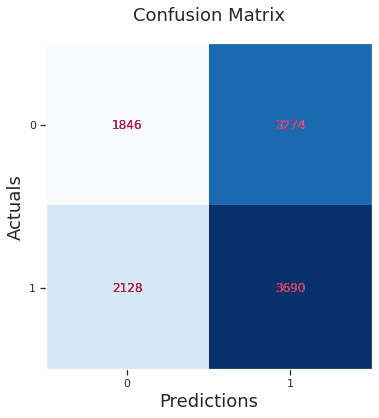

In [116]:
# confusion matrix to compare the test labels to the prediction
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, card_predictions)

# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6,6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

# change color of occurences
for i in range(2):
  for e in range(2):
    ax.text(e, i, cm[i, e], ha='center', va='center', color='crimson')


plt.title('Confusion Matrix', fontsize=18)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Model with Regularization

- Regularization reduces the size of parameters $w_j$ reducing its impact

  - If we have smaller values of $w_1, w_2, w_3, ... , w_n$ we will have a simpler model that is less likely to Overfit

<br>

  $$ \frac{λ}{2m} \sum_{j=1}^{n} w_{j}^2 $$

<br>

- You first compute the Cost $J$ and the Gradients of $w_j$ and at the end you compute the Regularization

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Training / Cross Validation / Test Set

- The Dataset will be splitted into:

  - *Training Set* $⟶$ 60% of Data

  - *Cross Validation Set* $⟶$ 20% of Data
    - The *Cross Validation Set* is going to be used to test the *Validity / Accuracy* of different *Models / Parameters*

  - *Test Set* $⟶$ 20% of Data

In [138]:
# split data into training and X_ Y_
X_train, X_, Y_train, Y_ = train_test_split(x_inputs, y_labels, test_size=0.4, random_state=1)

# split X_, Y_ into Cross Validation and Test
X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size=0.5, random_state=1)

# Training Set
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}', '\n')

# Cross Validation Set
print(f'X_cv shape: {X_cv.shape}')
print(f'Y_cv shape: {Y_cv.shape}', '\n')

# Test Set
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (21874, 10)
Y_train shape: (21874,) 

X_cv shape: (7291, 10)
Y_cv shape: (7291,) 

X_test shape: (7292, 10)
Y_test shape: (7292,)


In [139]:
# test parameters
b_init = 1.5
w_init = np.array([1.5, 1.8, 2, 2.3, 1.7, 1.2, 2.1, 1.4, 1.2, 1.4])

print(f'w_init shape: {w_init.shape}')

w_init shape: (10,)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Regularized Cost Function $J$

<br>

$$ J(\vec{w}, b) = \frac{1}{m} \sum_{i=1}^{m} [Loss(f(x^{(i)}) - y^{(i)})] + \frac{λ}{2m} \sum_{j=1}^{m} w_j^2   $$

<br>

- $Loss(f(x^{(i)}) - y^{(i)}) = $

  $$ (-y^{(i)} \log(f(x^{(i)})) - (1 - y^{(i)}) \log(1 - f(x^{(i)}) $$

<br>

In [124]:
# function to calculate regularized cost
def calculate_cost_regu(x, y, w, b, lam):

  # store m, n
  m, n = x.shape
  # var to store cost
  cost = 0
  # var to store regularization of w
  regu_w = 0

  for i in range(m):
    # calculate y_hat for ith row
    y_hat = np.dot(w, x[i]) + b
    # calculate sigmoid_z for ith row
    sigmoid_z = 1 / (1 + np.exp(-y_hat))
    # calculate error(loss) for ith row
    error = (-y[i] * np.log(sigmoid_z)) - ((1 - y[i]) * np.log(1 - sigmoid_z))

    cost += error

  # divide cost
  cost /= m

  # compute regularization
  for j in range(n):
    # add w[j]**2 to regu_w
    regu_w += (w[j]**2)

  # multiply by lambad/2m
  regu_w = regu_w * (lam / (2*m))

  # add regu_w to cost
  cost += regu_w

  return cost

In [140]:
# test regularized cost function
cost_regu_test = calculate_cost_regu(X_train, Y_train, w_init, b_init, lam=0.7)

cost_regu_test

5.29979619192239

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Regularized Gradient of $\vec{w}$ and $b$

- Partial Derivative of $J$ with respect to $w_j$

<br>

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum[(f(x^{(i)}) - y^{(i)}) * x_j^{(i)}] + \frac{λ}{m} w_j $$

<br>

- Partial Derivative of $J$ with respect to $b$

<br>

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum (f(x^{(i)}) - y^{(i)}) $$

<br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [136]:
# function to calculate regularized gradients
def calculate_gradients_regu(x, y, w, b, lam):

  # vars to store m, n
  m, n = x.shape
  # vars to store gradients
  dJ_dw = np.zeros((n, ))
  dJ_db = 0

  for i in range(m):
    # calculate y_hat for ith row
    y_hat = np.dot(w, x[i]) + b
    # calculate sigmoid_z for ith row
    sigmoid_z = 1 / (1 + np.exp(-y_hat))
    # calculate error for ith row
    error = sigmoid_z - y[i]

    # calculate gradient for each w_j
    for j in range(n):
      dJ_dw[j] += error * x[i, j] 

    # dJ_db
    dJ_db += error

  # divide gradients / m
  dJ_dw /= m
  dJ_db /= m

  # update dJ_dw with regularization
  for j in range(n):
    dJ_dw[j] += ((lam / m) * w[j])

  return dJ_dw, dJ_db

In [141]:
# test regularized gradient function 
test_dJ_dw, test_dJ_db = calculate_gradients_regu(X_train, Y_train, w_init, b_init, lam=0.7)

print(f'Test dJ_dw Regularized: {test_dJ_dw}', '\n')
print(f'Test dJ_db Regularized: {test_dJ_db}')

Test dJ_dw Regularized: [0.32429707 0.17993115 0.32538841 0.39480524 0.12791297 0.05603802
 0.42664594 0.36382914 0.15148347 0.24501429] 

Test dJ_db Regularized: 0.4765192842983426


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)